Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset

In [10]:
df = pd.read_csv("merged.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    4600 non-null   int64  
 1   country                       4600 non-null   object 
 2   country_code                  4600 non-null   object 
 3   year                          4600 non-null   int64  
 4   health_exp                    4600 non-null   float64
 5   life_expect                   4600 non-null   float64
 6   maternal_mortality            4600 non-null   int64  
 7   infant_mortality              4600 non-null   float64
 8   neonatal_mortality            4600 non-null   float64
 9   under_5_mortality             4600 non-null   float64
 10  inci_tuberc                   4600 non-null   float64
 11  prev_undernourishment         4600 non-null   float64
 12  Geographical subregion        4163 non-null   object 
 13  Con

In [12]:
df.drop(df.columns[[0,2,14,15,16,17,18,19,20,21]], axis=1, inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 4600 non-null   object 
 1   year                    4600 non-null   int64  
 2   health_exp              4600 non-null   float64
 3   life_expect             4600 non-null   float64
 4   maternal_mortality      4600 non-null   int64  
 5   infant_mortality        4600 non-null   float64
 6   neonatal_mortality      4600 non-null   float64
 7   under_5_mortality       4600 non-null   float64
 8   inci_tuberc             4600 non-null   float64
 9   prev_undernourishment   4600 non-null   float64
 10  Geographical subregion  4163 non-null   object 
 11  Continental region      4163 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 431.4+ KB


In [14]:
df.describe()

,year,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,inci_tuberc,prev_undernourishment
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,2011.000000,6.182907,69.878327,184.432174,27.732749,15.741167,38.512275,134.357928,11.434812
std,6.633971,2.740284,8.628714,258.887493,24.963637,12.462214,39.745232,185.610326,10.841945
min,2000.000000,1.107200,41.957000,1.000000,1.500000,0.800000,1.900000,0.000000,1.100000
25%,2005.000000,4.163175,64.421750,16.000000,7.700000,4.900000,9.100000,17.000000,2.600000
50%,2011.000000,5.554389,71.766427,65.000000,18.350000,11.700000,21.600000,57.000000,7.200000
75%,2017.000000,7.897373,76.188854,261.000000,42.500000,24.800000,57.700000,189.000000,16.600000
max,2022.000000,21.827950,84.560000,1687.000000,138.300000,62.700000,228.400000,1590.000000,67.400000


In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4163 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 4163 non-null   object 
 1   year                    4163 non-null   int64  
 2   health_exp              4163 non-null   float64
 3   life_expect             4163 non-null   float64
 4   maternal_mortality      4163 non-null   int64  
 5   infant_mortality        4163 non-null   float64
 6   neonatal_mortality      4163 non-null   float64
 7   under_5_mortality       4163 non-null   float64
 8   inci_tuberc             4163 non-null   float64
 9   prev_undernourishment   4163 non-null   float64
 10  Geographical subregion  4163 non-null   object 
 11  Continental region      4163 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 422.8+ KB


Checking correlations among indicators

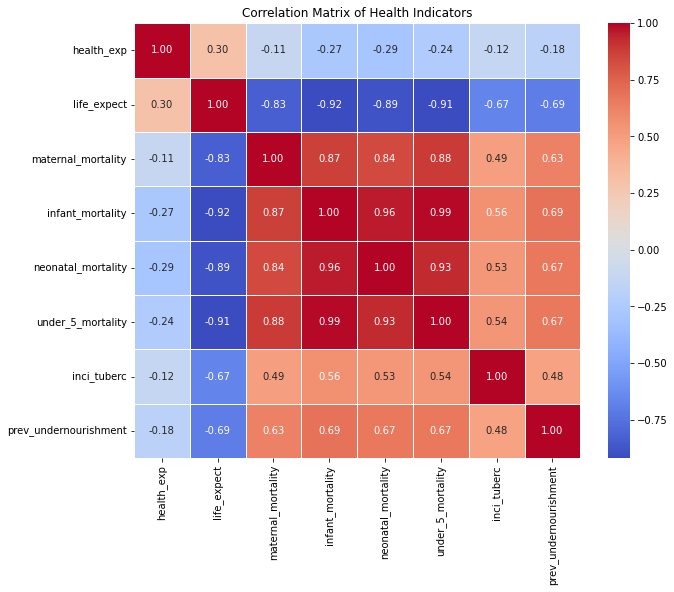

In [19]:
cols = ['health_exp', 'life_expect', 'maternal_mortality', 'infant_mortality', 
                'neonatal_mortality', 'under_5_mortality', 'inci_tuberc', 'prev_undernourishment']
corr_data = df[cols]
corr_matrix = corr_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Health Indicators')
plt.show()

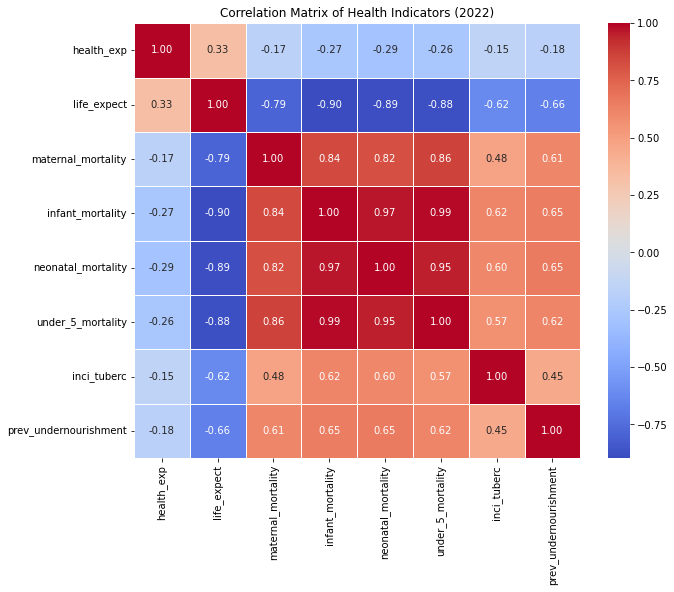

In [20]:
df_2022 = df[df['year'] == 2022]
corr_data_2022 = df_2022[cols]

corr_matrix_2022 = corr_data_2022.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_2022, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Health Indicators (2022)')
plt.show()

Lets start with clustering analysis... here countries will be clustured based on their performance on various health indicators.It will guide in policy formation towards tackling various challenges and will guide in efficient resource allocation. Countries with favourable health profile can also be served as case studies.

We will first start by clustering countries based on thier mortality profiles and health expenditure.

In [21]:
#First, we will filter out data for year 2022 as our clustering analysis will consider only latest data for clustering purposes
#It will be more useful for clustering countries for a single year. Data for multiple years at once will make it difficult to separate out countries

df_2022 = df[df['year'] == 2022]

In [29]:
df_year_2022 = df[df['year'] == 2022]
features = ['prev_undernourishment', 'infant_mortality','neonatal_mortality','under_5_mortality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_year_2022[features])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

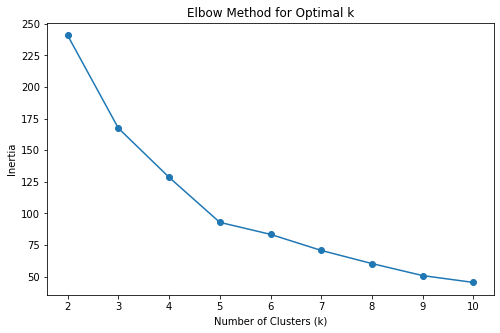

In [30]:
inertia = []
k_range = range(2, 11)

# Calculate inertia for different values of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\apraj\AppData\Local\Temp/ipykernel_14228/934037344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_2022['Cluster'] = clusters


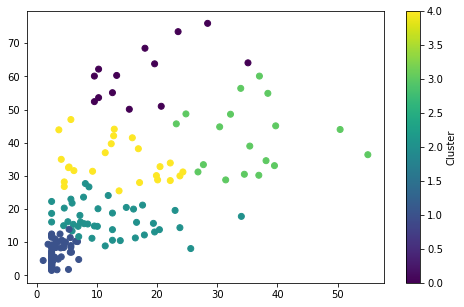

Cluster Centers (Centroids):
[[ 0.61634941  2.31491106  2.00325753  2.50246611]
 [-0.69171971 -0.77819288 -0.81869964 -0.72971804]
 [ 0.0999398  -0.15577344 -0.10986854 -0.22558953]
 [ 2.25086513  1.22706945  1.28080195  1.16351773]
 [ 0.22411955  0.82206638  1.01201941  0.72065405]]


In [31]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)  # Assign each data point to a cluster

# Add the cluster labels to your data (optional, for later inspection)
df_year_2022['Cluster'] = clusters

# Step 7: Visualize the Clusters
plt.figure(figsize=(8, 5))
plt.scatter(df_year_2022['prev_undernourishment'], df_year_2022['infant_mortality'], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.show()

print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

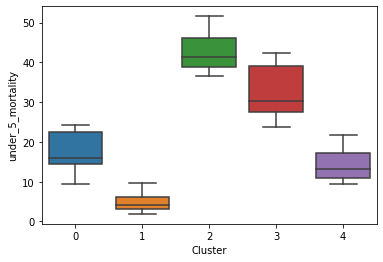

In [32]:
import seaborn as sns
sns.boxplot(x='Cluster', y='under_5_mortality', data=filtered_data)
plt.show()

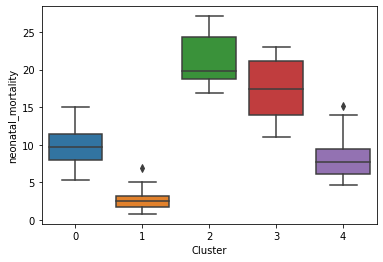

In [33]:
sns.boxplot(x='Cluster', y='neonatal_mortality', data=filtered_data)
plt.show()

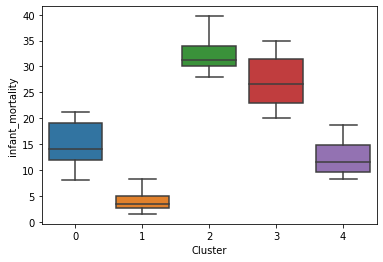

In [34]:
sns.boxplot(x='Cluster', y='infant_mortality', data=filtered_data)
plt.show()

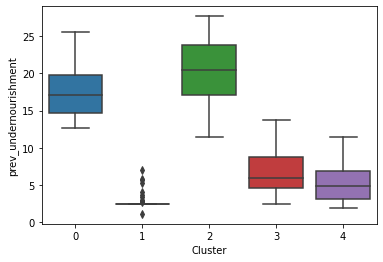

In [35]:
sns.boxplot(x='Cluster', y='prev_undernourishment', data=filtered_data)
plt.show()

To be continued